In [1]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from livelossplot import PlotLossesKerasTF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import Precision, Recall

In [3]:
data=pd.read_csv(r"C:\Users\Asus\OneDrive\Dataset\gold fund.csv")
data.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,187,14,1,14,1,0,0,0,0,0,0,0,0,0,0


In [4]:
x=data.iloc[:,1:-1]
y=data.Gold_Fund
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [5]:
stdSc=StandardScaler()
stdSc.fit(x_train)
x_train_std=stdSc.transform(x_train)
x_test_std=stdSc.transform(x_test)

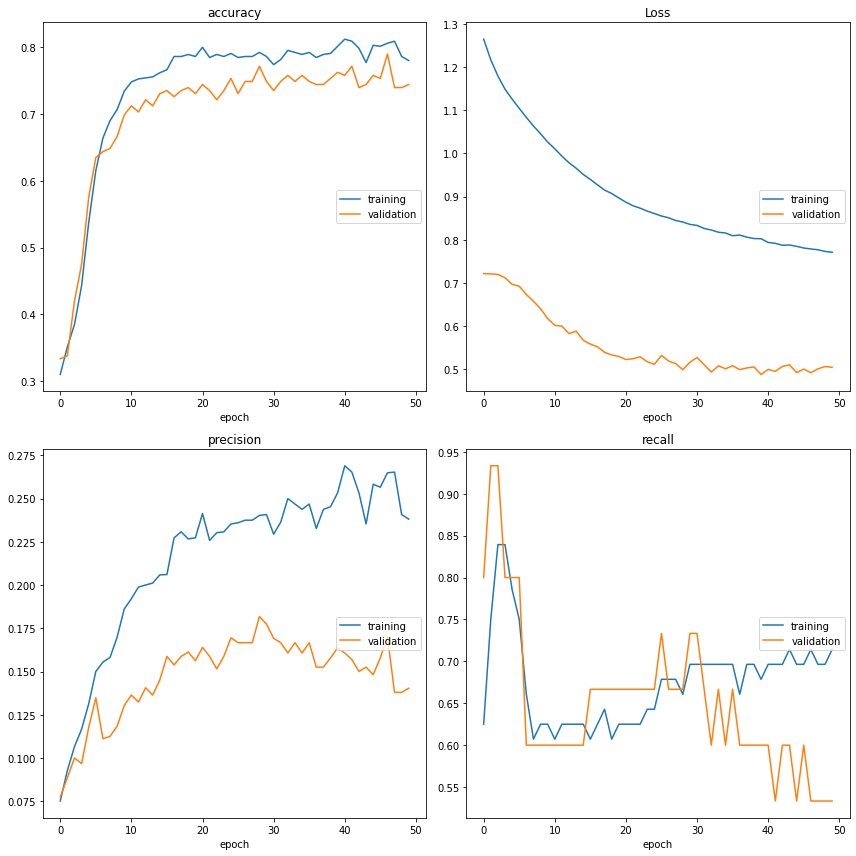

accuracy
	training         	 (min:    0.310, max:    0.812, cur:    0.780)
	validation       	 (min:    0.333, max:    0.790, cur:    0.744)
Loss
	training         	 (min:    0.771, max:    1.264, cur:    0.771)
	validation       	 (min:    0.488, max:    0.722, cur:    0.505)
precision
	training         	 (min:    0.075, max:    0.269, cur:    0.238)
	validation       	 (min:    0.077, max:    0.182, cur:    0.140)
recall
	training         	 (min:    0.607, max:    0.839, cur:    0.714)
	validation       	 (min:    0.533, max:    0.933, cur:    0.533)
21/21 [==============================] - 1s 30ms/step - loss: 0.7712 - accuracy: 0.7802 - precision: 0.2381 - recall: 0.7143 - val_loss: 0.5048 - val_accuracy: 0.7443 - val_precision: 0.1404 - val_recall: 0.5333


In [6]:
goldModel=Sequential()
goldModel.add(Dense(10,activation="relu"))#h1
goldModel.add(Dense(10,activation="relu"))#h2
goldModel.add(Dense(1,activation="sigmoid"))#output
goldModel.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

goldModel.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test),class_weight={0:1,1:10})

In [7]:
goldModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                160       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [8]:
data.Gold_Fund.value_counts(), y_train.value_counts()

(0    803
 1     71
 Name: Gold_Fund, dtype: int64,
 0    599
 1     56
 Name: Gold_Fund, dtype: int64)

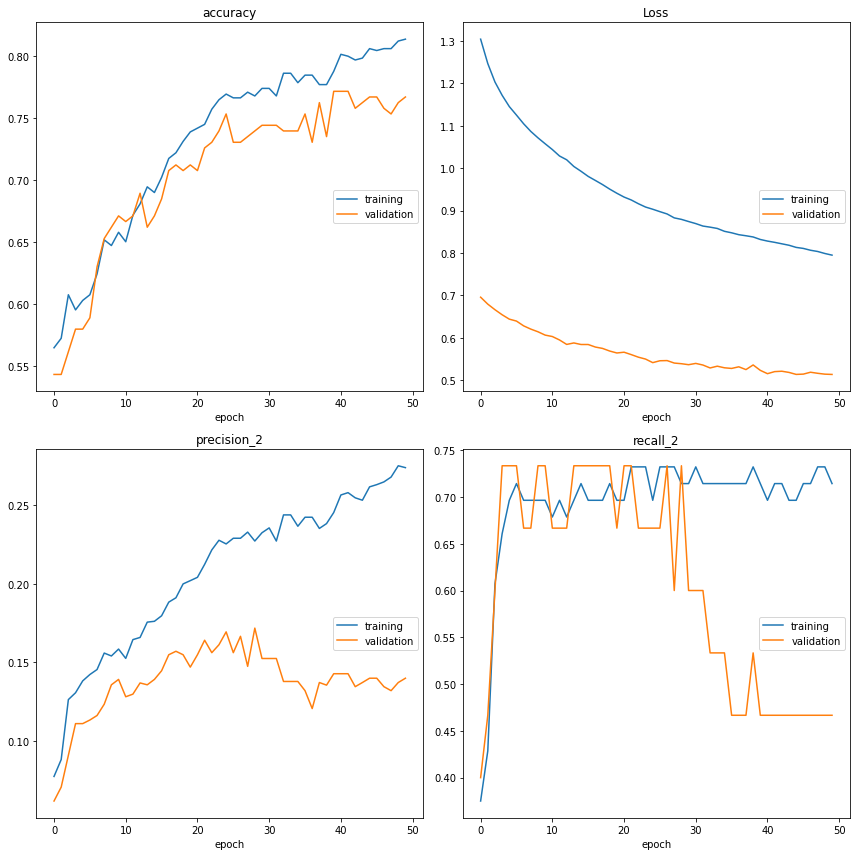

accuracy
	training         	 (min:    0.565, max:    0.814, cur:    0.814)
	validation       	 (min:    0.543, max:    0.772, cur:    0.767)
Loss
	training         	 (min:    0.795, max:    1.304, cur:    0.795)
	validation       	 (min:    0.514, max:    0.696, cur:    0.514)
precision_2
	training         	 (min:    0.077, max:    0.275, cur:    0.274)
	validation       	 (min:    0.062, max:    0.172, cur:    0.140)
recall_2
	training         	 (min:    0.375, max:    0.732, cur:    0.714)
	validation       	 (min:    0.400, max:    0.733, cur:    0.467)
21/21 [==============================] - 1s 28ms/step - loss: 0.7950 - accuracy: 0.8137 - precision_2: 0.2740 - recall_2: 0.7143 - val_loss: 0.5136 - val_accuracy: 0.7671 - val_precision_2: 0.1400 - val_recall_2: 0.4667


In [10]:
#changing activation fn
goldModel=Sequential()
goldModel.add(Dense(10,activation="tanh"))#h1
goldModel.add(Dense(10,activation="tanh"))#h2
goldModel.add(Dense(1,activation="sigmoid"))#output
goldModel.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

goldModel.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test),class_weight={0:1,1:10})

Dropout

In [11]:
from tensorflow.keras.layers import Dropout

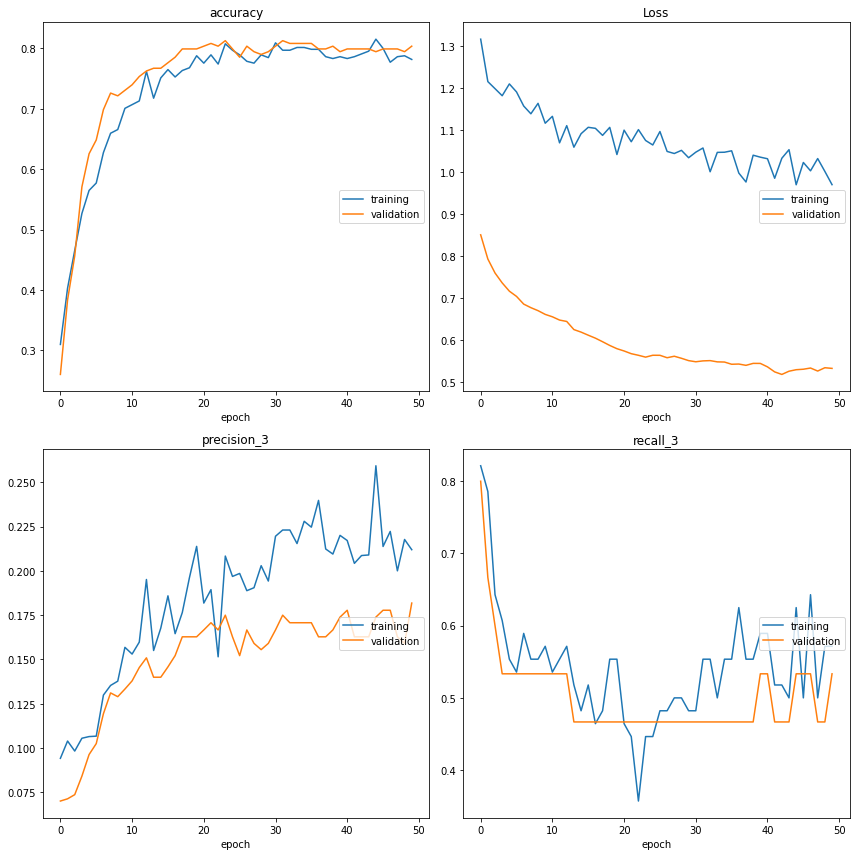

accuracy
	training         	 (min:    0.310, max:    0.815, cur:    0.782)
	validation       	 (min:    0.260, max:    0.813, cur:    0.804)
Loss
	training         	 (min:    0.970, max:    1.316, cur:    0.970)
	validation       	 (min:    0.519, max:    0.851, cur:    0.533)
precision_3
	training         	 (min:    0.094, max:    0.259, cur:    0.212)
	validation       	 (min:    0.070, max:    0.182, cur:    0.182)
recall_3
	training         	 (min:    0.357, max:    0.821, cur:    0.571)
	validation       	 (min:    0.467, max:    0.800, cur:    0.533)
21/21 [==============================] - 1s 28ms/step - loss: 0.9701 - accuracy: 0.7817 - precision_3: 0.2119 - recall_3: 0.5714 - val_loss: 0.5330 - val_accuracy: 0.8037 - val_precision_3: 0.1818 - val_recall_3: 0.5333


In [12]:
goldModel=Sequential()
goldModel.add(Dense(10,activation="relu"))#h1
goldModel.add(Dropout(0.3))
goldModel.add(Dense(10,activation="relu"))#h2
goldModel.add(Dropout(0.3))
goldModel.add(Dense(1,activation="sigmoid"))#output
goldModel.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

goldModel.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test),class_weight={0:1,1:10})

L2 Regularization

In [13]:
from tensorflow.keras.regularizers import l2

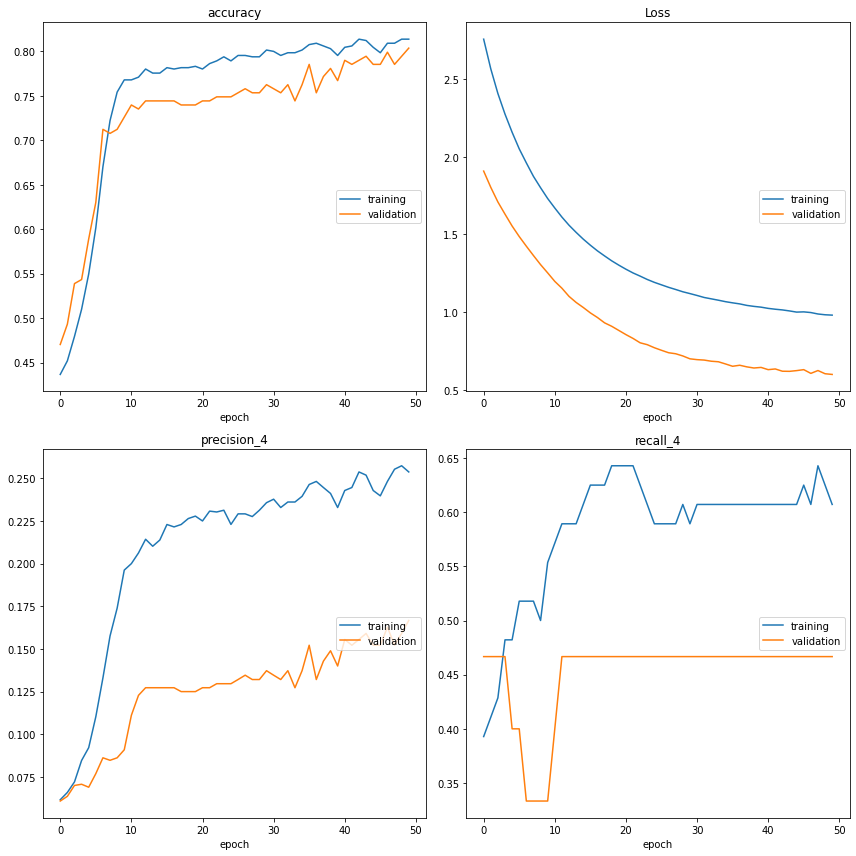

accuracy
	training         	 (min:    0.437, max:    0.814, cur:    0.814)
	validation       	 (min:    0.470, max:    0.804, cur:    0.804)
Loss
	training         	 (min:    0.981, max:    2.756, cur:    0.981)
	validation       	 (min:    0.599, max:    1.908, cur:    0.599)
precision_4
	training         	 (min:    0.062, max:    0.257, cur:    0.254)
	validation       	 (min:    0.061, max:    0.167, cur:    0.167)
recall_4
	training         	 (min:    0.393, max:    0.643, cur:    0.607)
	validation       	 (min:    0.333, max:    0.467, cur:    0.467)
21/21 [==============================] - 1s 32ms/step - loss: 0.9807 - accuracy: 0.8137 - precision_4: 0.2537 - recall_4: 0.6071 - val_loss: 0.5991 - val_accuracy: 0.8037 - val_precision_4: 0.1667 - val_recall_4: 0.4667


In [14]:
goldModel=Sequential()
goldModel.add(Dense(10,activation="relu", kernel_regularizer=l2(0.1)))#h1
goldModel.add(Dense(10,activation="relu"))#h2
goldModel.add(Dense(1,activation="sigmoid"))#output
goldModel.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

goldModel.fit(x_train_std,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test),class_weight={0:1,1:10})